In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import seaborn as sns

In [18]:
def year_data_gr ():
    data = pd.read_csv("서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = "euc-kr")
    data['year'] = data['사용월'].apply(lambda x: str(x)[:4])
    
    data_sr = data.sort_values(by = ['호선명','지하철역'], ascending = [True, True])
    
    x_data = ['2015', '2016', '2017']
    data_qr = data_sr.query('year != @x_data')
    
    df = data_qr.iloc[0:, 0:47]
    
    df['year'] = df['사용월'].apply(lambda x: str(x)[:4])
    
    df_gr = df.groupby('year').sum()
    df_gr.drop('사용월', axis = 1)
    df_gr['total'] = df_gr.sum(axis = 1)
    
    plt.rcParams['font.family'] = 'AppleGothic'
    
    df_gr_m = df_gr['total']
    
    df_gr_m.plot(kind='bar', figsize=(30,20), fontsize=40)

    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 40)



    year_plt = plt.show()
    
    return year_plt, df

/var/folders/70/_t6jnr7s3_s60h0zhtk312fh0000gn/T/ipykernel_68571/2137344321.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values], fontsize = 40)


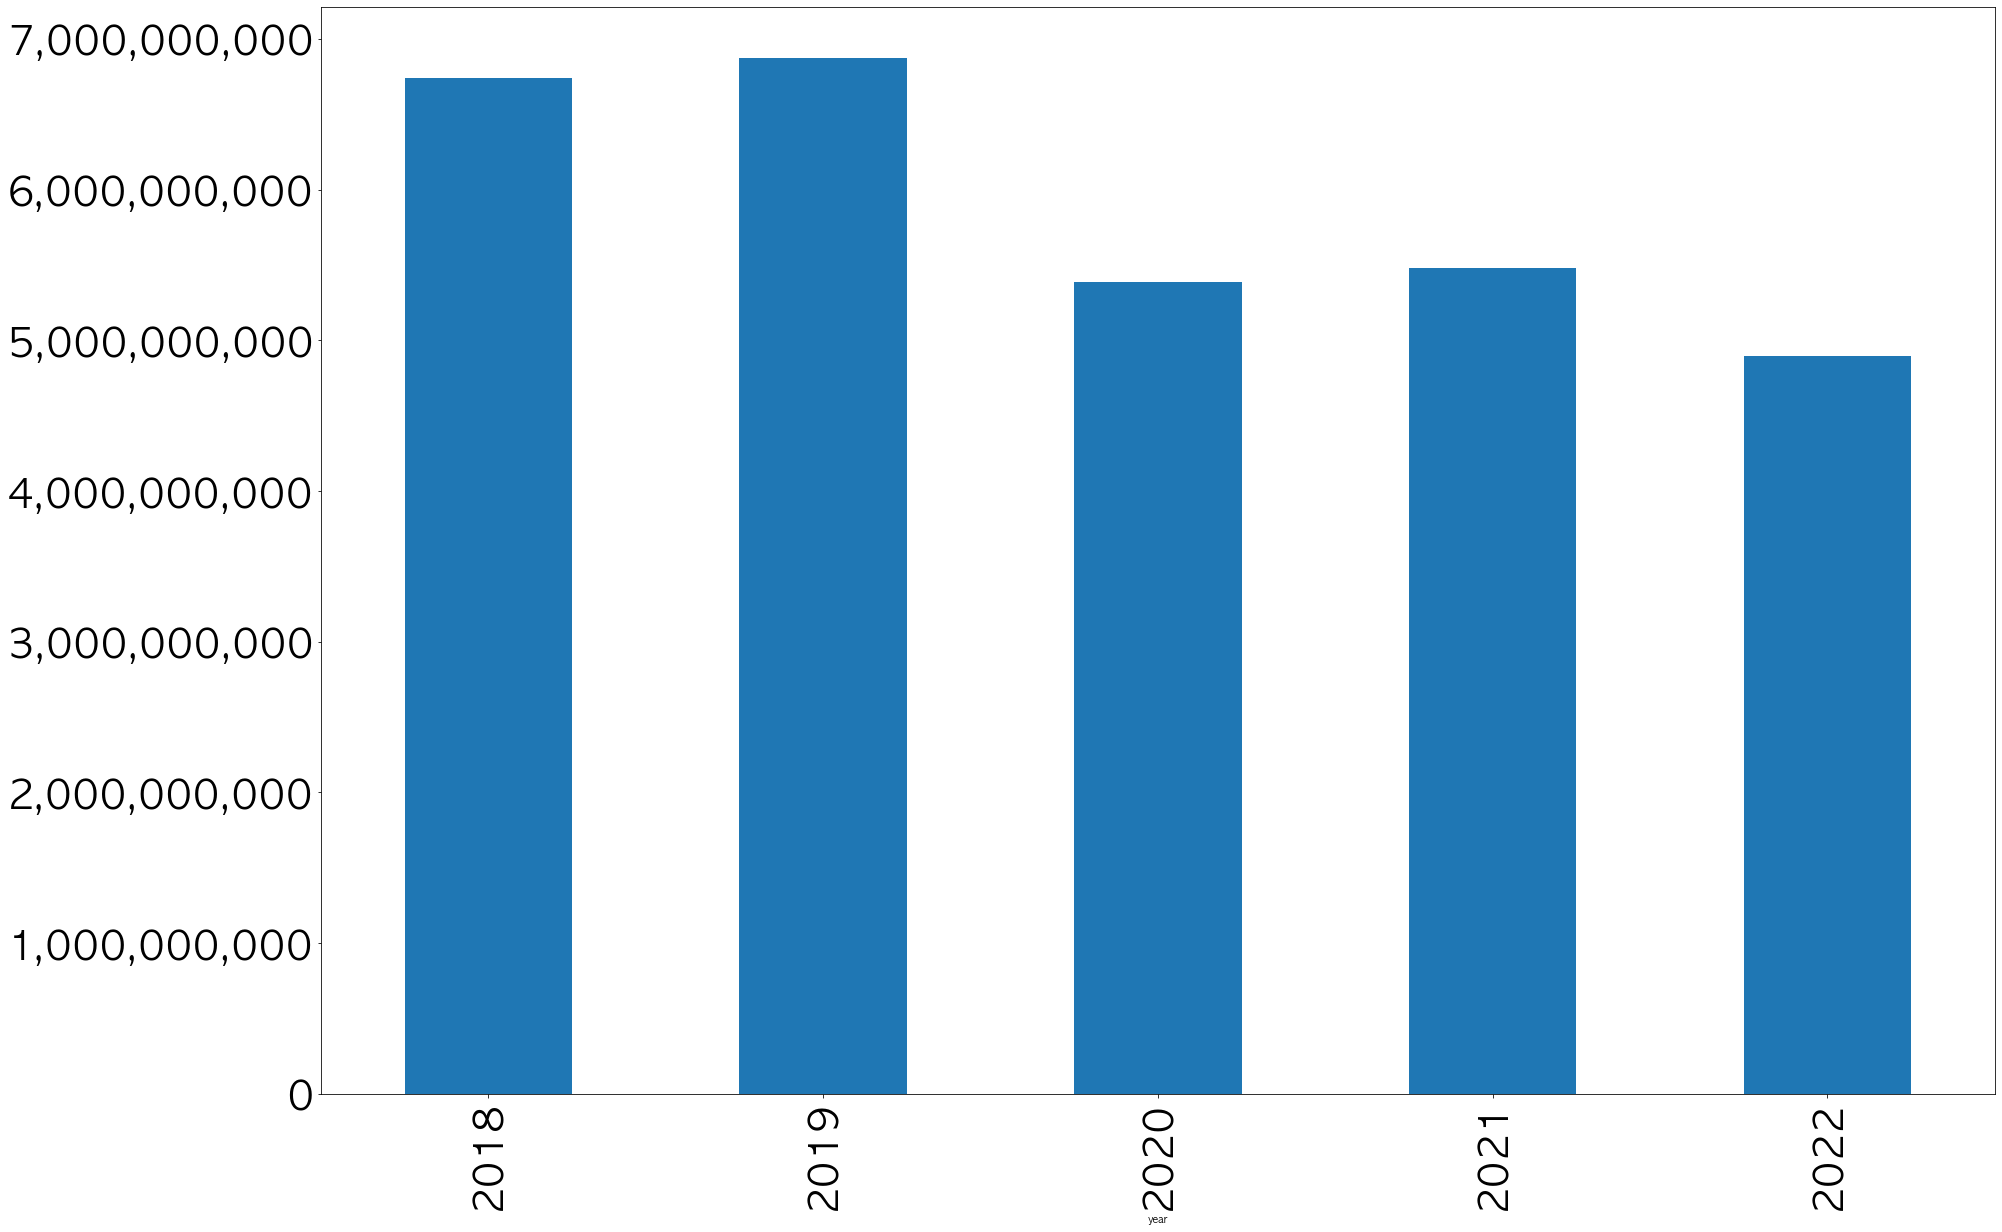

In [19]:
year_df, df = year_data_gr()

In [31]:
xdata = '2022'
data_qr = df.query('year == @xdata')

In [36]:
df_d = data_qr.drop('year', axis= 1)

In [39]:
df_d

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원
0,202210,1호선,동대문,729,6,11017,1926,9398,6871,14707,...,13377,11666,10591,10596,5076,8316,440,2216,1,191
615,202209,1호선,동대문,692,10,10195,1888,8595,6719,14334,...,12641,10923,10337,9684,4814,8085,418,1956,21,161
1230,202208,1호선,동대문,561,16,9859,1842,8375,6305,13390,...,11441,10406,9117,9518,4047,7319,292,1711,0,144
1847,202207,1호선,동대문,735,23,11155,1937,8866,7600,14047,...,12927,11008,10781,10253,4582,8598,157,1412,0,39
2462,202206,1호선,동대문,890,31,11300,2056,8821,7698,14163,...,13069,10945,11218,9477,4350,8677,25,1595,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,202205,중앙선,회기,862,14,13527,4051,22694,14087,57910,...,29040,40372,29528,45985,12525,31038,161,6154,0,0
4299,202204,중앙선,회기,694,8,11400,3662,20202,11892,53416,...,24652,35598,23586,39443,10298,26085,194,5206,0,0
4908,202203,중앙선,회기,516,5,10542,3197,18144,10625,48570,...,21629,32087,22264,35397,9622,23475,82,3857,0,0
5516,202202,중앙선,회기,436,2,8851,2853,14791,8473,40880,...,20769,34806,12531,30491,3364,11445,48,1494,0,0


In [40]:
df_s = df_d.groupby('사용월').sum()

In [42]:
df_s['total'] = df_s.sum(axis = 1)

In [65]:
df_s

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,total
사용월,,,,,,,,,,,,,,,,,,,,,
202201,96060,1376,2409613,624831,5147629,3342763,13118677,7715014,15607393,18644525,...,9514477,3367008,5587539,783547,2167153,5936,207605,31,86,335012067
202202,85566,1229,2148782,557529,4463127,2953684,11238445,6647544,13154565,15780120,...,7045300,3535136,5019178,691531,2061839,5233,186297,35,52,284217299
202203,108758,1654,2571335,662736,5393620,3523519,13838987,8366471,15421064,18888483,...,6365148,5114955,5755716,1970706,3948756,11302,465364,50,78,326397644
202204,120630,1773,2804818,716421,5934403,3845448,15055501,9127848,17034002,20578785,...,7349488,5908454,6620500,2274072,4559125,23507,657066,85,105,367719971
202205,137587,2203,3197514,808973,6584376,4326325,16277459,9948869,18507319,22184279,...,8383483,6900812,7682336,2594925,5313843,25474,796475,79,323,406148880
202206,135398,1925,3098540,786881,6354211,4184351,15560605,9583611,17500378,21035507,...,7836919,6385363,7186779,2517386,4791511,214630,1066726,163,22879,382106221
202207,142848,1945,3150674,813307,6484294,4256474,15700455,9714864,17558958,21235547,...,8045875,6458287,7368209,2580765,4809787,258873,1166947,212,25729,386418319
202208,140350,2073,3005990,779316,6262876,4080658,15205894,9388259,17042598,20621281,...,7584449,5935950,6894092,2433330,4344645,297473,1214509,417,34113,372175449
202209,141170,1882,2939439,764280,6186188,3975743,15690025,9425631,17559434,21120428,...,7710079,6205578,7053939,2608222,4598355,333663,1341522,1753,42690,384701552
